# STEP 1: Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
import joblib


# STEP 2: Load Model Artifacts

In [16]:
model = joblib.load("../models/linear_regression_model.pkl")
scaler = joblib.load("../models/scaler.pkl")
feature_cols = joblib.load("../models/feature_columns.pkl")


# STEP 3: Load Test Data

In [17]:
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")


# STEP 4: Ensure Correct Feature Order

In [18]:
X_test = X_test[feature_cols]


# STEP 5: Scale Test Data

In [19]:
X_test_scaled = scaler.transform(X_test)


# STEP 6: Make Predictions

In [20]:
y_pred = model.predict(X_test_scaled)


# STEP 7: Evaluation Metrics

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 12.28033510079426
RMSE: 3.5043309062921355
R2 Score: 0.9058926590665994


# STEP 8: Actual vs Predicted Plot

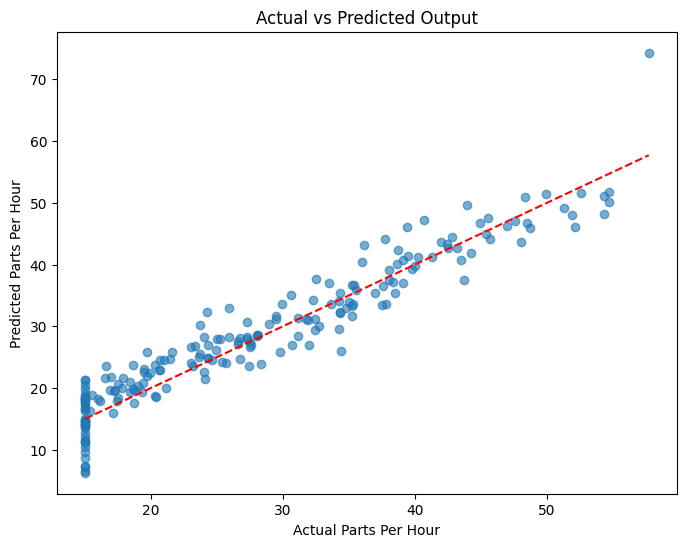

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Parts Per Hour")
plt.ylabel("Predicted Parts Per Hour")
plt.title("Actual vs Predicted Output")
plt.show()


# STEP 9: Residual Analysis

In [23]:
# Residuals
residuals = y_test.values.flatten() - y_pred

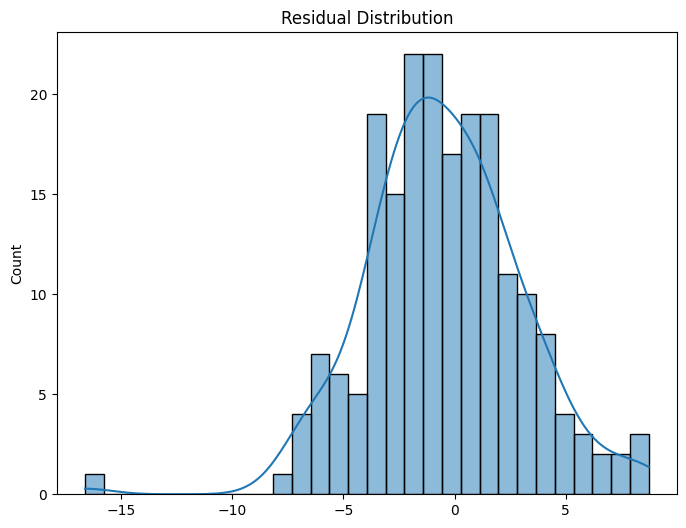

In [24]:
# Distribution 
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution")
plt.show()


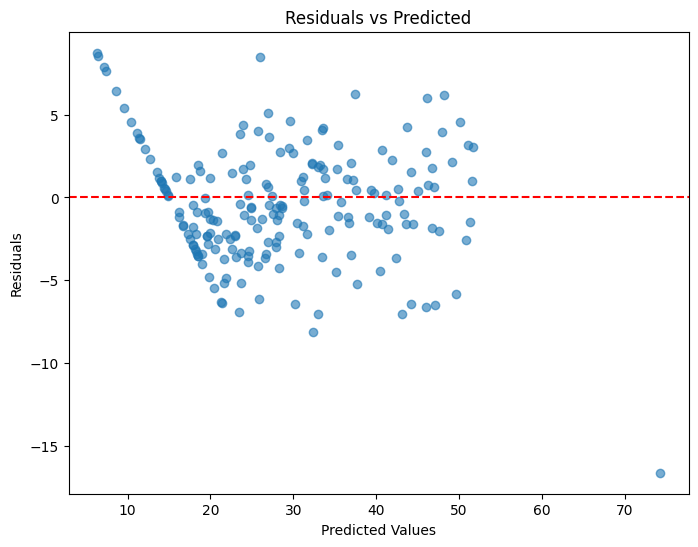

In [25]:
# Residuals vs Predictions 
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
